**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

**Loading Dataset**

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


In [4]:
val=df['XLarge Bags'].value_counts()
print(val)

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64


**Data Cleaning**

In [5]:
#dropping Unnecessary Column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


**Exploratory Data Analysis**

In [7]:
df.shape

(18249, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
print("Dataset Contain null value :",df.isnull().sum())

Dataset Contain null value : Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**Data Vizualization**

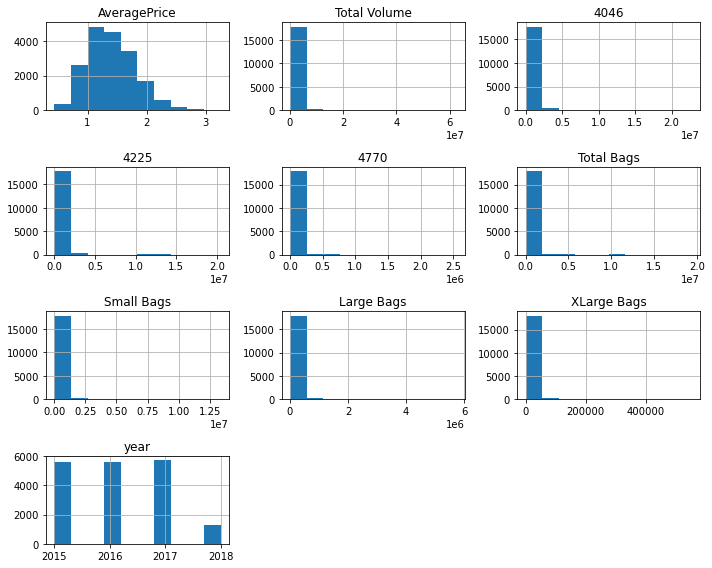

In [11]:
# Plot histograms for all columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

* Average price is between 1.5 & 2 per 4000 unit.
* 2018 recorded lowest sale of avocado comared to all previous year.

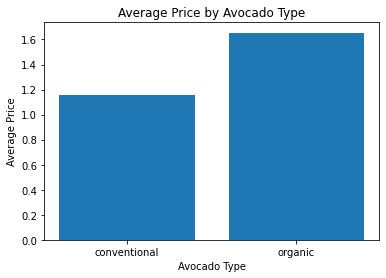

In [12]:
#grouping the data in column
grouped_data = df.groupby('type')['AveragePrice'].mean()
#plotting the bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')
plt.title('Average Price by Avocado Type')
plt.show()

* Conventional price is lower than Organic Avocado.

**Feature Engineering**

In [13]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
#transforming Typer column with label encoding techinique.
label = LabelEncoder()
label.fit(df['type'].drop_duplicates())
df['Type'] = label.transform(df['type'])

In [15]:
df.drop(['type'],axis=1,inplace=True)

In [16]:
#transforming date column as day and months.
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [17]:
df['AveragePrice_YearDifference'] = df.groupby('region')['AveragePrice'].diff()

In [18]:
df['Price_Ratio'] = df['AveragePrice'] / df.groupby('region')['AveragePrice'].transform('mean')

In [19]:
window_size = 7  # Adjust the window size as needed
df['Moving_Average'] = df.groupby('region')['AveragePrice'].rolling(window_size, min_periods=1).mean().reset_index(level=0, drop=True)

In [20]:
df.drop(['Date'],axis=1,inplace=True)

In [21]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Type,Day,Month,AveragePrice_YearDifference,Price_Ratio,Moving_Average
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0,27,12,NaN,0.851999,1.330000
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0,20,12,0.02,0.864811,1.340000
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0,13,12,-0.42,0.595758,1.203333
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0,6,12,0.15,0.691848,1.172500
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0,29,11,0.20,0.819969,1.194000


**Small Bags,Large Bags,Xlarge Bags VS Total Volume**

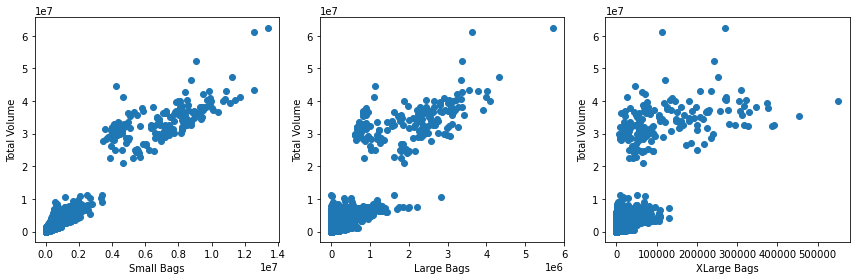

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Scatter plot for 'Small Bags' vs 'Total Volume'
axes[0].scatter(df['Small Bags'], df['Total Volume'])
axes[0].set_xlabel('Small Bags')
axes[0].set_ylabel('Total Volume')
# Scatter plot for 'Large Bags' vs 'Total Volume'
axes[1].scatter(df['Large Bags'], df['Total Volume'])
axes[1].set_xlabel('Large Bags')
axes[1].set_ylabel('Total Volume')
# Scatter plot for 'XLarge Bags' vs 'Total Volume'
axes[2].scatter(df['XLarge Bags'], df['Total Volume'])
axes[2].set_xlabel('XLarge Bags')
axes[2].set_ylabel('Total Volume')

plt.tight_layout()
plt.show()


**Small bags,Large Bags,XLarge Bags VS Total Bags**

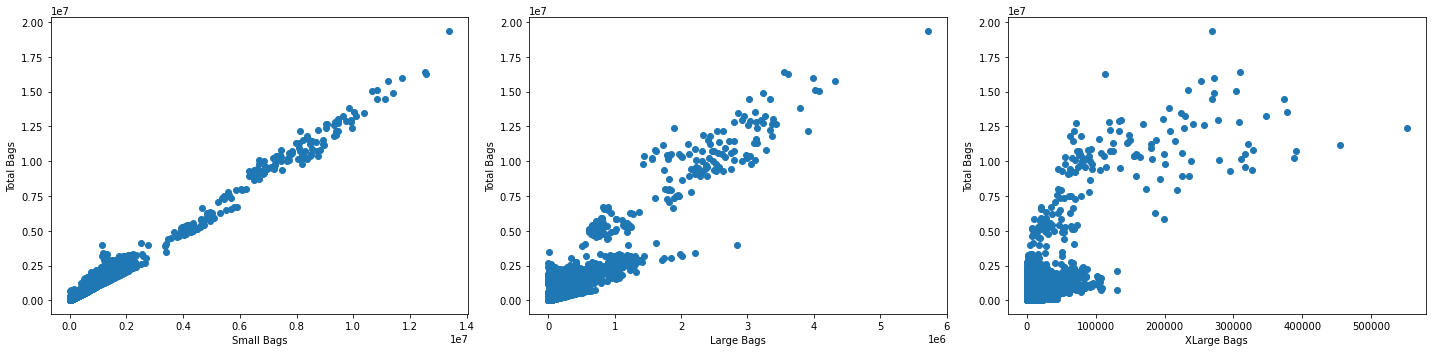

In [23]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
# Scatter plot for 'Small Bags' vs 'Total Bags'
axes[0].scatter(df['Small Bags'], df['Total Bags'])
axes[0].set_xlabel('Small Bags')
axes[0].set_ylabel('Total Bags')
# Scatter plot for 'Large Bags' vs 'Total Bags'
axes[1].scatter(df['Large Bags'], df['Total Bags'])
axes[1].set_xlabel('Large Bags')
axes[1].set_ylabel('Total Bags')
# Scatter plot for 'XLarge Bags' vs 'Total Bags'
axes[2].scatter(df['XLarge Bags'], df['Total Bags'])
axes[2].set_xlabel('XLarge Bags')
axes[2].set_ylabel('Total Bags') 

plt.tight_layout()
plt.show()

**Year vs Region**

In [24]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Type,Day,Month,AveragePrice_YearDifference,Price_Ratio,Moving_Average
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0,27,12,NaN,0.851999,1.330000
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0,20,12,0.02,0.864811,1.340000
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0,13,12,-0.42,0.595758,1.203333
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0,6,12,0.15,0.691848,1.172500
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0,29,11,0.20,0.819969,1.194000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,1,4,2,0.06,1.291906,1.570000
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1,28,1,0.08,1.355313,1.591429
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1,21,1,0.16,1.482126,1.635714
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1,14,1,0.06,1.529680,1.691429


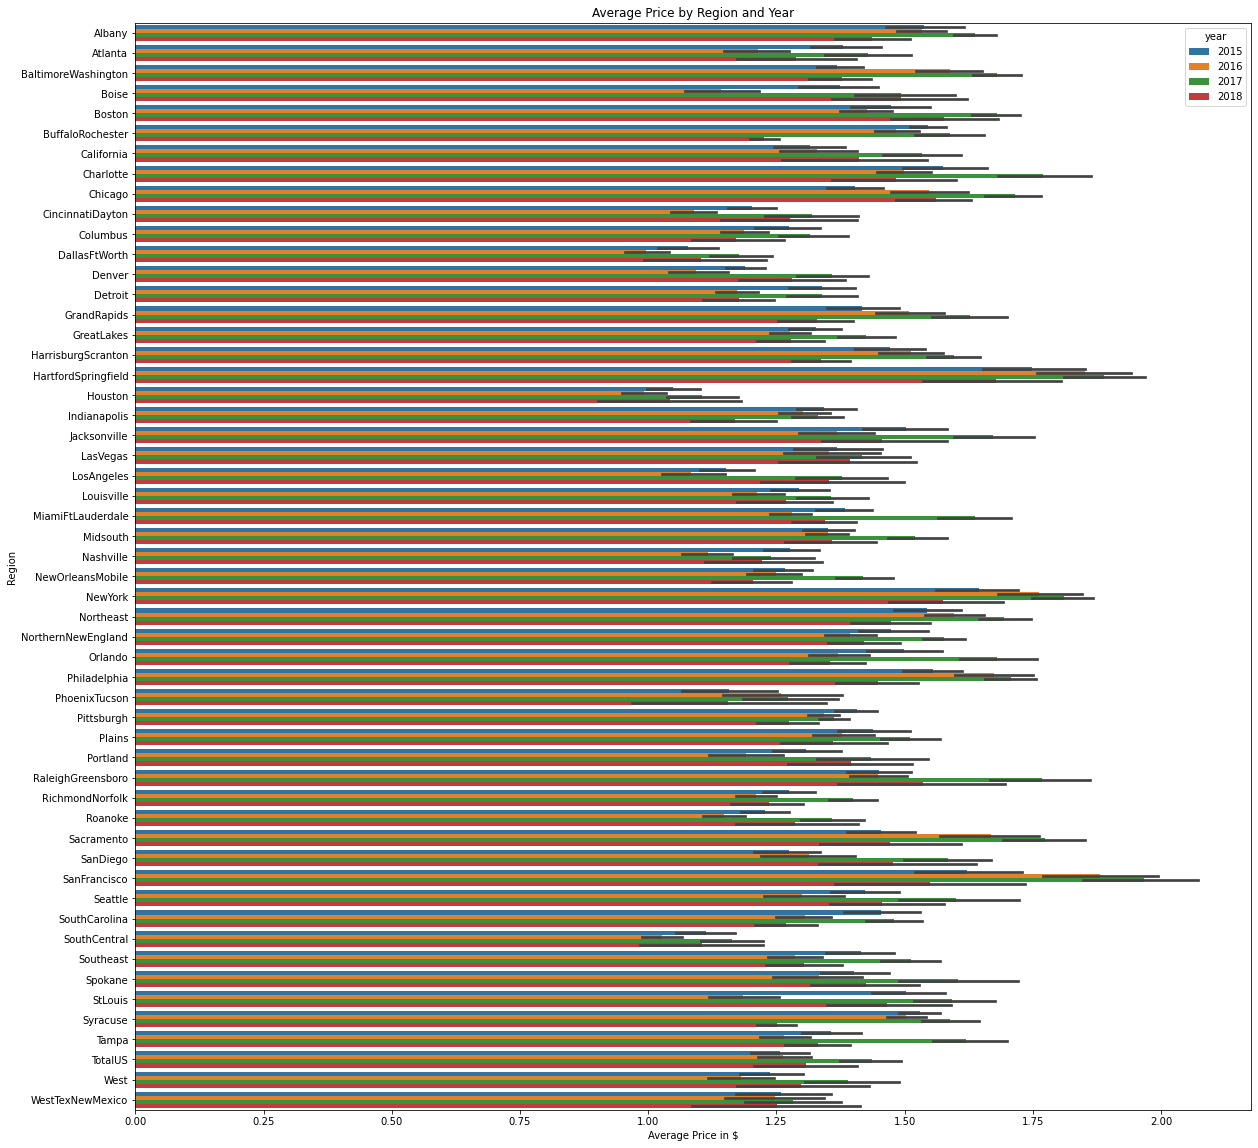

In [25]:
# Set the figure size
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed

# Plotting code
sns.barplot(x='AveragePrice', y='region', hue='year', data=df)
plt.xlabel('Average Price in $')
plt.ylabel('Region')
plt.title('Average Price by Region and Year')

# Display the legend
plt.legend(title='year')

# Display the plot
plt.show()

Sanfrancisco>Hartfordspriingfield>Charlotte>Neworleansmobile has the highest Average Price upto 2💲 , and in 2017 has no. of the selling  which went upto 2 💲  and in 2018 the average price has been decreased to 1.3$. Housten and southcentral has the lowest price of avocado i.e around 1 💲  to 1.14 💲 .

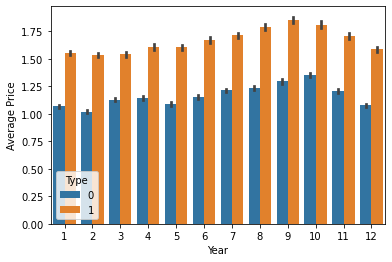

In [26]:
sns.barplot(x='Month',y='AveragePrice',hue='Type',data=df)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Average Price Over the year is around 1.3$ approx and in the months of september and october prices rises upto 1.5 💵 . we can also see that Organic Avocado price is certainly high in comparision to Conventional 🥑.

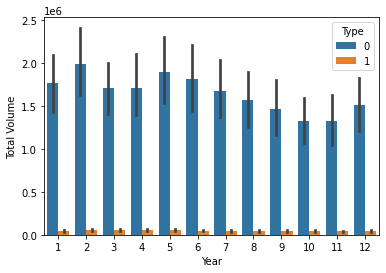

In [27]:
sns.barplot(x='Month',y='Total Volume',hue='Type',data=df)
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

Conventional Avocado volume is high over all the year, while total volume of organic avocado is certainly less over all the year.

In [28]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Type,Day,Month,AveragePrice_YearDifference,Price_Ratio,Moving_Average
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0,27,12,NaN,0.851999,1.330000
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0,20,12,0.02,0.864811,1.340000
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0,13,12,-0.42,0.595758,1.203333
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0,6,12,0.15,0.691848,1.172500
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0,29,11,0.20,0.819969,1.194000


In [29]:
#df.drop(['AveragePrice'],axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

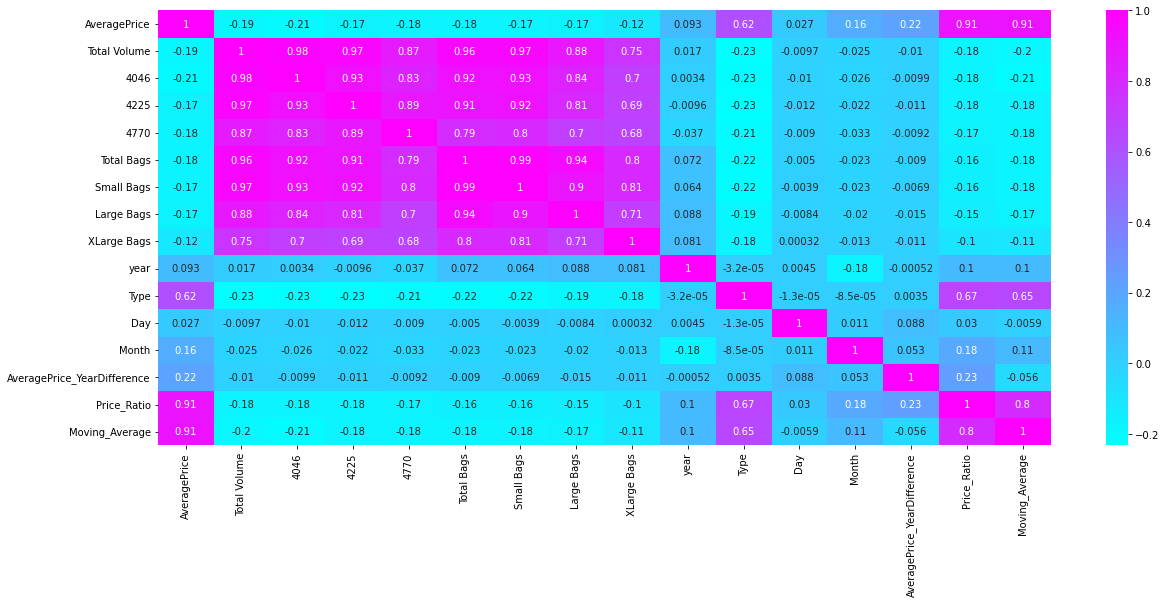

In [30]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap='cool',annot=True)
plt.show

In [31]:
#Splitting Data into X and Y 
X=df.drop(['AveragePrice','region'],axis=1)
Y=df['AveragePrice']

In [32]:
#Making sure that there will bw no missing value left in the X
X.dropna(axis=1,inplace=True)

In [33]:
#Satndarizing the data 
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

In [34]:
#Train Test and Split test.
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_data,Y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [38]:
r2

0.9255806393133601

In [39]:
mse

0.012006689345426555

In [40]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [41]:
# Model Summary
y_pred_model = model.predict(X_test)

r_squared = r2_score(Y_test,y_pred_model)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred_model))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9255806393133601
RMSE : 0.10957503979203728


**Model Tuning**

In [42]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [46]:
predictions=rf_random.predict(X_test)

In [48]:
r_squared = r2_score(Y_test,predictions)
rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print("R_squared :",r_squared)

R_squared : 0.9697638946607933


In [51]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred_model))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred_model))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_model)))

MAE: 0.08159629825601121
MSE: 0.012006689345426555
RMSE: 0.10957503979203728


C:\Users\amits\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


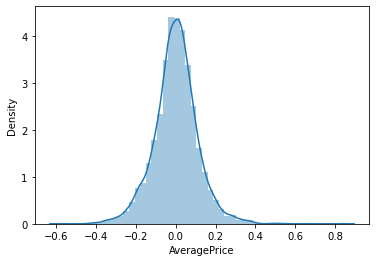

In [53]:
sns.distplot(Y_test-y_pred_model)
plt.show()

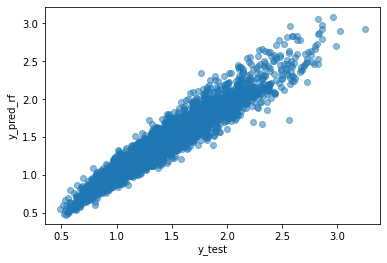

In [52]:
plt.scatter(Y_test, y_pred_model, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()

In [55]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_model), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = Y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
5470,4.84,5.16,0.31,6.04
5471,2.47,2.56,0.09,3.70
5472,8.36,12.43,4.06,32.70
5473,6.30,6.42,0.12,1.90
5474,3.01,3.49,0.48,13.85
